# The Iterative Relaxation Method
> Written by Ryan Soklaski

## Understanding Fixed-Points
In mathematics, a function $f(x)$ is said to have a "fixed-point" solution if there exists a value $x_{*}$ such that $f(x_{*}) = x_{*}$. That is, $f$ maps $x_{*}$ to itself. As a simple example, given $f(x) = x^{2}$, check that $f$ has a fixed-points at $x = 0$ and $x = 1$.

For a less trivial example, let's see if the function $f(x) = x^{2} - 1$ has any fixed points. That is, we want to find all solutions to $f(x) = x$:

\begin{equation}
x^{2} - 1 = x \\\
x^{2} - x - 1 = 0 \\\
x = -0.61803...,\; x = 1.61803...
\end{equation}

We made use of the [quadratic formula](https://en.wikipedia.org/wiki/Quadratic_formula) to find the two fixed-points for $f(x) = x^{2} - 1$. 

Consider that solving the fixed-point equation $f(x) = x$ is tantamount to finding where the values of $x$ where $f(x)$ intersects the line $y = x$:
![Fixed-points for a quadratic equation](attachment:quadratic.png)

There are many functions such that one cannot simply solve for $x$. For example, neither of the following equations are amenable to any algebraic manipulation that would reveal their solutions :
\begin{equation}
\sin{x} = x \\\
e^{x} - 1 = x
\end{equation}

Such equations are thus known as *transcendental* equations. How, then, can we find the fixed-point solutions (if they exist) for such functions? There is a simple numerical method, known as the relaxation method, that can be used towards this end.

## The Relaxation Method
Suppose for now that $f(x)$ has one fixed-point solution, $x_{*}$. The relaxation method allows us to "guess" a fixed-point solution, and then iteratively improve upon this guess until you have arrived at a value that is sufficiently close to the true fixed-point, $x_{*}$. 

Specifically, given your initial guess of $f$'s fixed-point, $x_{0}$, you can generate a better guess by simply feeding $x_{0}$ to $f$, and using the output as your updated guess, $x_{1}$: 
\begin{equation}
x_{1} = f(x_{0})
\end{equation}

You can then improve this guess by feeding $x_{1}$ to $f$ and using the output as the next guess. Repeating this process $n$ times will produce $n$ consecutively-improved guesses at the true fixed-point, $x_{*}$:
\begin{equation}
x_{1} = f(x_{0}) \\\
x_{2} = f(x_{1}) \\\
x_{3} = f(x_{2}) \\\
... \\\
x_{n} = f(x_{n-1}) \\\
\\\
x_{n} \approx x_{*}
\end{equation}

For example, let's find a fixed point for $f(x) = \tanh{5x}$ taking an initial guess of $0.5$.
\begin{equation}
-0.9866143 = f(0.5) \\\
-0.9998962 = f(-0.9866143) \\\
-0.99990912 = f(-0.99990911) \\\
-0.99990912 = f(-0.99990912) \\\
\end{equation}

We arrived at a fixed-point (within 7 decimal-places of precision) after four iterations!

### Caveats to the relaxation method 
For all its simplicity, the relaxation method is not a completely robust solution for finding fixed points, in which case this method can only potentially find one, for a given initial guess. It will fail if your function does not have fixed points. It is also very much possible for a function to have multiple fixed points. Additionally, this iterative process can "blow up" and lead you to ever-growing numbers if you use a "bad" starting guess. It is possible for the relaxation method to get stuck in a loop. If you try to find the fixed points for $x^2 - 1$ using an initial guess of $x_{o} = 0.5$, you will find that you eventually repeatedly guess 0, -1, 0, -1, 0, .... Be aware of these pitfalls when you are testing your code - they are a fundamental issue of the relaxation method, and not a symptom of bad code. 

You need not worry about accounting for these issues in your code. You will never be given pathological functions/guesses that would cause these issues, in this homework.




### Problem #1
Write a relaxation-method function that accepts three arguments:
- a python function, which accepts a number as an input, and returns a float as an output
- an initial guess for the fixed-point, $x_{0}$, a floating-point number
- the number of iterations, $n$, to perform the relaxation method on the provided function

Your function should return a list of the $n+1$ numbers: the initial guess and the $n$ guesses that you generate using the relaxation method. 

So, in the context of the preceding relaxation example, I could define the function:
```python
from math import tanh
def f(x):
    return tanh(5*x)
```
and then calling your relaxation function, passing it this function, an initial guess of $x_{o}=0.5$, and instructing it to perform 5 iterations, should produce the following list:
```python
>>> relaxation_method(f, xo=-.5, num_it=5)
[-0.5,
 -0.98661429815143031,
 -0.99989620032332682,
 -0.99990910997226823,
 -0.99990912170456125,
 -0.99990912171522284]
```
That is, your `relaxation_method` function should call `f(xo)` to obtain the updated-guess for the fixed point, as the first iteration, and so on. Use the parameters provided in this example to test your code. 

In [1]:
def relaxation_method1(func, xo, num_it):
    """ Performs the relaxation method to find a fixed-point for `func`,
        given the initial guess `xo`. The relaxation process is carried out for
        `num_it` steps.
        
        Parameters
        ----------
        func : Callable[[float], float]
            The function whose fixed point is being found.
        xo : float
            The initial "guess" value.
        num_it : int
            The number of relaxation-iterations to perform.
        
        Returns
        -------
        List[float]
            A list of the initial guess, and all of the subsequent guesses generated
            by the relaxation method. """
#     student code goes here
    FINAL_LIST = []
    FINAL_LIST.append(xo)
    while len(FINAL_LIST) < num_it+1:
        x = FINAL_LIST[-1]
        result = func(x)
        FINAL_LIST.append(result)

    return FINAL_LIST
   

In [2]:
# run this cell to grade your work
from bwsi_grader.python.relaxation_method import grader1 
grader1(relaxation_method1)

Using grader version 1.4.0
Finding fixed-points for the function: f(x) = x**2
Finding fixed-points for the function: f(x) = tanh(4*x)

============================== ALL TESTS PASSED! ===============================
Your submission code: bwb8e4b8ae3afecb32279a3941952049fff73d1181e93d77b45f39506c



## Problem #2
Our current implementation of the relaxation method is quite crude in that we must specify the number of iterations that it performs, and then simply look at the output to see if we have converged to a fix-point. It would instead be better if we could have our algorithm check its own numbers to see if they are converging to a single value, and then terminate itself if it has converged.

We can measure how close our most recent guess is to a fixed-point by looking at our most-recent three guesses $x_{n-2}, x_{n-1}, x_{n}$ , and seeing if $x_{n-1}$ and $x_{n}$ are closer to one another than are $x_{n-1}$ and $x_{n-2}$. Skipping a formal derivation, the following formula gives an upper-bound estimate on how close $x_{n}$ is to a true fixed-point:

\begin{equation}
\epsilon_{n} = \lvert\frac{(x_n - x_{n-1})^2}{2x_{n-1} - x_{n-2} - x_{n}}\rvert
\end{equation}

That is, if your previous three guesses were $1.0$, then $1.63$, and then $1.80$, plugging these into the preceding formula produces an error bound of $\epsilon = 0.06$. This means that the guess $1.80$ is within $0.06$ of the true fixed-point. To prevent division-by-zero errors, if your denominator is equal to 0.0, replace it with the value `1e-14`.

Armed with this formula, we can now write a much better algorithm, which can operate based on a tolerance rather than a strict number of iterations.

Write a second version of the relaxation-method. This function should accept four arguments:
- a python function, which accepts a number as an input, and returns a float as an output
- an initial guess for the fixed-point, $x_{0}$, a floating-point number
- a tolerance value, a positive-valued floating-point number
- a max number of iterations that your algorithm is permitted to run

Your algorithm should produce guesses until $\epsilon_{n}$ is smaller than the specified tolerance value, or until the number of guesses produced (including the initial guess) matches/exceeds the max number of iterations. Like the last function, it should return a list of all the guesses. You will need to have three guesses before you can assess the tolerance.

In [34]:
def relaxation_method2(func, xo, tol, max_it):
    """ Performs the relaxation method to find a fixed-point for `func`,
        given the initial guess `xo`. The relaxation process is carried out for
        `num_it` steps.
        
        Parameters
        ----------
        func : Callable[[float], float]
            The function whose fixed point is being found.
        xo : float
            The initial "guess" value.
        tol : float
            A positive value that sets the maximum permissable error
            in the final fixed-point estimate.
        max_it : int
            The maximum number relaxation-guesses (i.e. the length of the
            list you are creating) allotted before the 
            algorithm will end. The length of the list you return should
            never exceed this number.
            
        Returns
        -------
        List[float]
            A list of the initial guess, and all of the subsequent guesses generated
            by the relaxation method. """
    # student code goes here
    
    FINAL_LIST = []
    FINAL_LIST.append(xo)
    dif = []
    dif.append(xo)
    while abs(dif[-1]) > tol and len(FINAL_LIST) < max_it:
#         if len(FINAL_LIST) > max_it+1:
#             break
        x = FINAL_LIST[-1]
        result = func(x)
        FINAL_LIST.append(result)        
        if len(FINAL_LIST) >= 3:
            diff = abs(((FINAL_LIST[-1]-FINAL_LIST[-2])**2)/(2*(FINAL_LIST[-2])-FINAL_LIST[-3]-FINAL_LIST[-1]))
            dif.append(diff)
        else:
            pass
            


    return FINAL_LIST

In [35]:
# run this cell to grade your work
from bwsi_grader.python.relaxation_method import grader2
grader2(relaxation_method2)

Finding fixed-points for the function: f(x) = 2 - exp(-x)

============================== ALL TESTS PASSED! ===============================
Your submission code: bw7ab135590053bf38cdb655fff9447e2553dfc315e04ed295c498190c



## A fun application of the relaxation method
The relaxation method is not just a parlor trick, nor are fixed-point equations a relic of pure-mathematics. The following will put the relaxation-function that you wrote to use, in order to solve a very real physics problem. You don't need to do any work here, just follow along and enjoy!

You have likely held a bar-magnet before - a special kind of metal that can use its magnetic field to push or pull on other magnets. Such a material is known as a ferromagnet, and it's magnetic properties are created by coordinated behavior among the electrons belonging to its atoms. The electrons in a ferromagnet naturally coordinate in such a way to create an overall magnetic field throughout and around the material. However, heating up a ferromagnet will jostle its atoms and electrons around, disturbing the coordination of the electrons and thus weakening the net magnetic field of the material. If you set out to describe the statistical behavior of a ferromagnetic material's electrons, you will eventually find that the strength of its magnetization, $M$, depends on temperature, $T$, according to the following equation:

\begin{equation}
M = \mu\tanh{\frac{JM}{k_{B}T}}
\end{equation}

where $\mu$ and $J$ are physical constants particular to the specific ferromagnetic material we are interested in, and $k_B$ is a fundamental constant from statistical mechanics. If $M = 0$, then the material is completely non-magnetic. For simplicity's sake, we'll set these constants to 1, without changing the essence of the problem at hand. Thus our equation for the magnetization of our material becomes: 

\begin{equation}
M = \tanh{\frac{M}{T}}
\end{equation}

This is a fixed-point equation! We can pick a value of $T$, and then use the relaxation method to solve for $M$. By varying $T$, we can measure the magnetization for each value of $T$, and thus understand how the material's magnetization depends on temperature.

In the following code, we will pick a value of $T$, and then solve for $M$ (within a given tolerance). Then we pick our next value of $T$ and repeat the process. Ultimately, we will have a collection of temperature values and corresponding magnetization values. We will plot $M$ vs $T$ to understand the temperature dependence for a ferromagnetic material.

In [15]:
# just run this cell - you don't need to change any of this code

import numpy as np
# `temps` is 1000 evenly-spaced values within [0, 1.5]
temps = np.linspace(0, 1.5, 1000)

mags = []
for T in temps:
    
    # define the magnetization function, given
    # the current temperature value
    def mag_func(m, temp=T): 
        return np.tanh(m / temp) if temp > 0. else 1.
    
    # Use the relaxation value to compute M within an error
    # of 1e-6.
    mag = relaxation_method2(mag_func, 1., 1e-6, 1000)[-1]
    mags.append(mag)

print("number of magnetization-values computed: {}".format(len(mags)))

number of magnetization-values computed: 1000


<IPython.core.display.Javascript object>


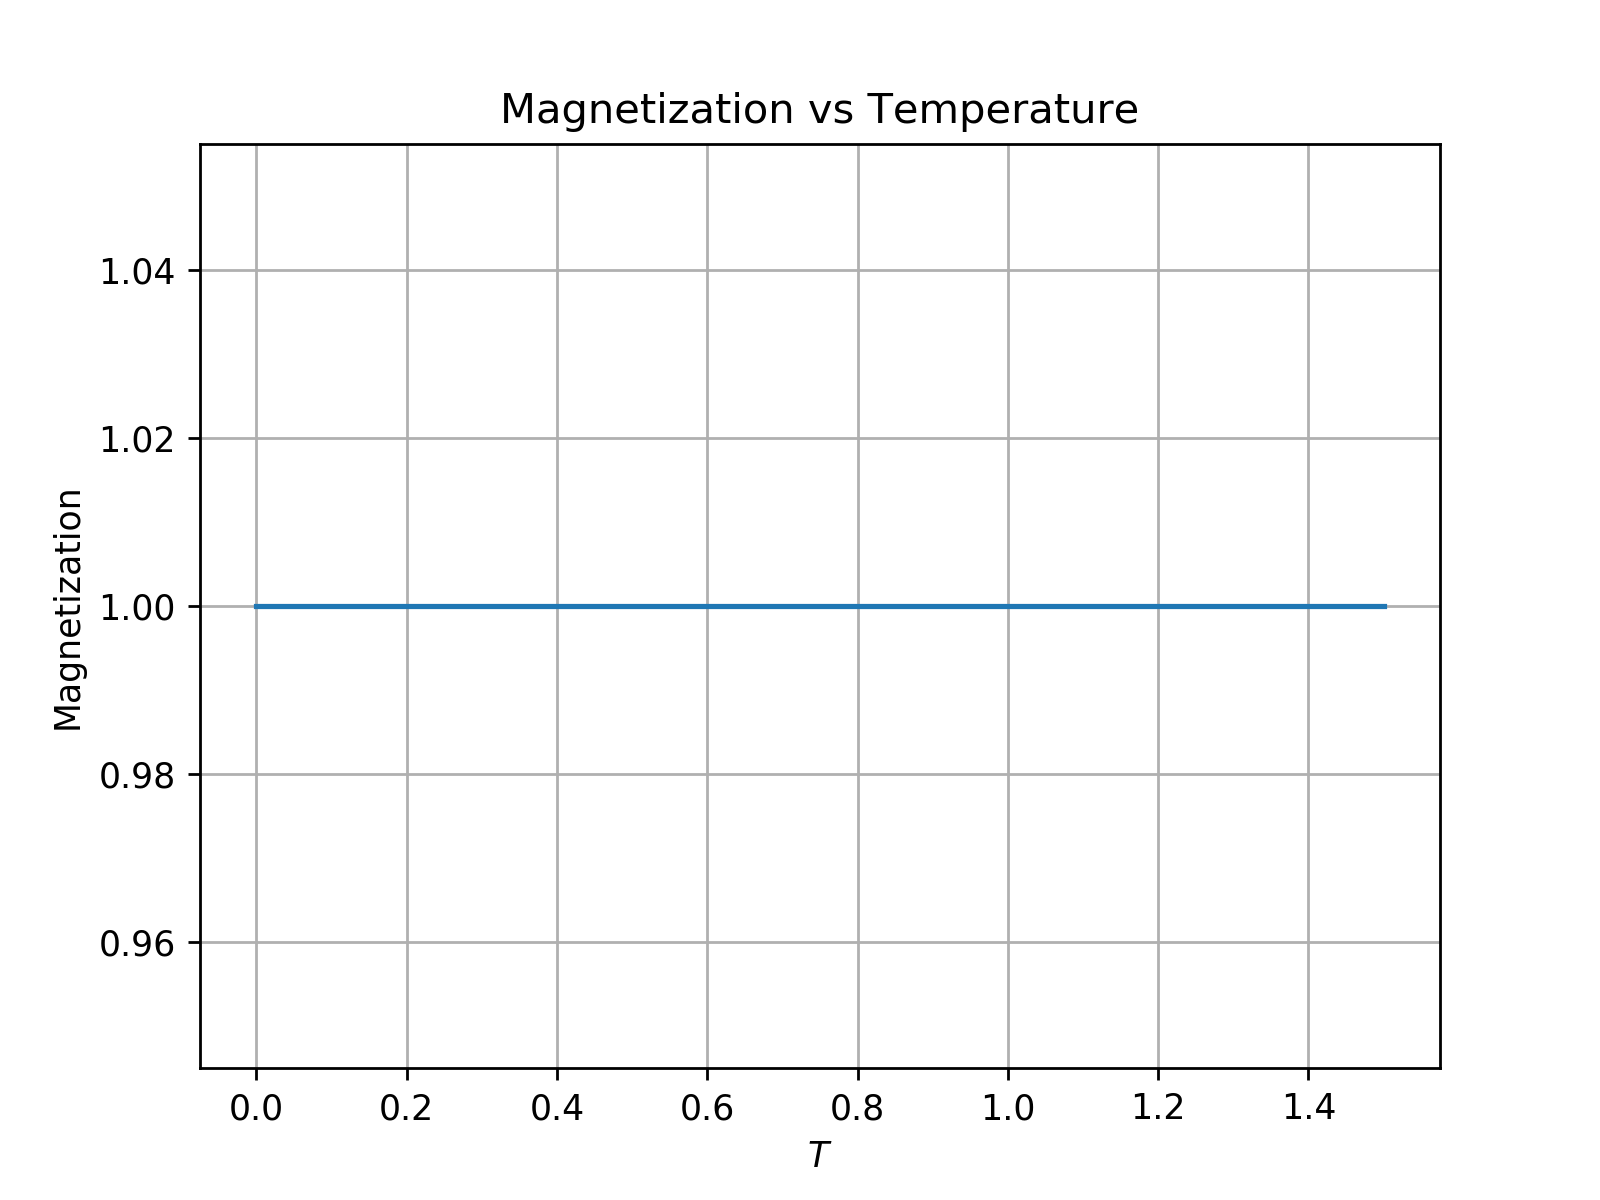

In [16]:
# just run this cell - you don't need to change any of this code

# Plotting M vs T
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(temps, mags)
ax.grid(True)
ax.set_ylabel("Magnetization")
ax.set_xlabel(r"$T$")
ax.set_title("Magnetization vs Temperature");

See that $M = 0$ for high temperatures, meaning that the material is non-magnetic when it is at a temperature greater than 1 (no actual units, since we set all those constants to be $1$). However, once the material is cooled to $T \leq 1$, the material suddenly magnetizes, and its magnetization strengthens as you cool it further.

This sudden magnetization at $T = 1$ is a *phase transition*. This is very similar to water freezing: water's atoms molecules will rapidly begin to form a crystal once they are cooled to 0-celsius or below. Similarly, we see that a ferromagnetic material's electrons will suddenly be able to coordinate and produce a net magnetic field throughout the material, once they are cooled to $T=1$ and below.

This is a no-joke physics problem that we were able to solve thanks to the relaxation method! If you look up the constants, $\mu$ and $J$, for a specific material, you can repeat this computation to produce its actual magnetic phase diagram. This rules!